Plots to show how the methods work for highly eccentric seob waveforms

In [1]:
import sys
sys.path.append("../../")
%load_ext autoreload
%autoreload 2

In [2]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict, lstyles, lwidths
import matplotlib.pyplot as plt
import numpy as np
from measureEccentricity.utils import get_peak_via_quadratic_fit

/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/seob/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Create eccentric waveforms using seobnrv4ehm

In [3]:
from EccTests.TestEOBvsMeasuredEcc.seobnrv4ehm import get_modes
import lal

In [4]:
M = 50
MT = M * lal.MTSUN_SI
q = 4
chi1 = -0.6
chi2=-0.6
Momega0_zeroecc = 0.002
f_low_zeroecc = Momega0_zeroecc/np.pi/MT
tzeroecc, hlmzeroecc = get_modes(q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=0, f_min=f_low_zeroecc, physical_units=False, save=False)
tzeroecc = tzeroecc - get_peak_via_quadratic_fit(tzeroecc, np.abs(hlmzeroecc[(2, 2)]))[0]
    
def getDataDict(Momega0, ecc):
    f_low = Momega0/np.pi/MT
    tecc, hlmecc = get_modes(q=4, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=ecc, f_min=f_low, physical_units=False, save=False)
    tecc = tecc - get_peak_via_quadratic_fit(tecc, np.abs(hlmecc[(2, 2)]))[0]
    startzero = np.argmin(np.abs(tzeroecc - tecc[0])) - 10
    dataDict = {"t": tecc, "hlm": hlmecc, "t_zeroecc": tzeroecc[startzero:], "hlm_zeroecc":{(2, 2): hlmzeroecc[(2, 2)][startzero: ]}}
    return dataDict

In [5]:
datadict = getDataDict(0.02, 0.5)

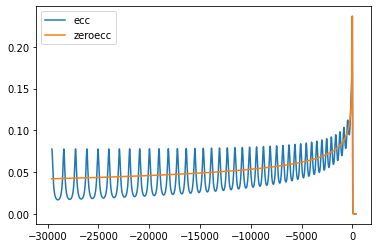

In [6]:
plt.plot(datadict["t"], np.abs(datadict["hlm"][(2, 2)]), label="ecc")
plt.plot(datadict["t_zeroecc"], np.abs(datadict["hlm_zeroecc"][(2, 2)]), label="zeroecc")
plt.legend()

In [7]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 11.697807927342922. Times of occurances are [-49628.30541035]
  warnings.warn(f"At least a pair of {extrema_type} are too far."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 11.039804944268496. Times of occurances are [-45715.62470675]
  warnings.warn(f"At least a pair of {extrema_type} are too far."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:364: UserWarning: At least a pair of troughs are too close. Minimum orbital phase diff is 0.9858136116361411. Times of occurances are [-59630.00520091 -52724.36438285]
  warnings.warn(f"At least a pair of {extrema_type} are too close."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measu

failed for 0.5416666666666666 for FrequencyFits.
failed for 0.6666666666666666 for FrequencyFits.
failed for 0.7291666666666666 for FrequencyFits.
failed for 0.75 for FrequencyFits.
failed for 0.8125 for FrequencyFits.
failed for 0.8333333333333333 for FrequencyFits.
failed for 0.8541666666666666 for FrequencyFits.
failed for 0.9166666666666666 for FrequencyFits.
failed for 0.9375 for FrequencyFits.
failed for 0.9583333333333333 for FrequencyFits.
failed for 0.9791666666666666 for FrequencyFits.


/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinitionUsingFrequencyFits.py:339: RuntimeWarning: invalid value encountered in double_scalars
  K = ((phase22[idx_extrema[-1]] - phase22[idx_extrema[0]])


failed for 1.0 for FrequencyFits.


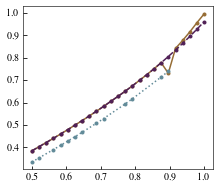

In [17]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
eobEccs = np.linspace(0.5, 1., 25)
for method in ["Amplitude", "ResidualAmplitude", "FrequencyFits"]:
    measuredEccs = []
    eEOB = []
    for EOBecc in eobEccs:
        dataDict = getDataDict(0.03, EOBecc)
        tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True})
            measuredEccs.append(ecc[0])
            eEOB.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")
    if len(measuredEccs) >= 1:
        ax.plot(eEOB, measuredEccs, marker=".", label=f"{method}", c=colorsDict[method], ls=lstyles[method])

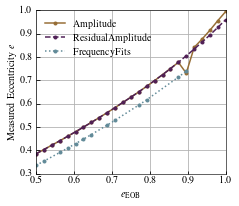

In [18]:
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(0.3, 1.0)
ax.set_xlim(0.5, 1.0)
ax.grid()
fig

In [19]:
fig.subplots_adjust(right=0.96, top=0.98)
fig.savefig("../../../public_html/EccDefinition/high_ecc_test.pdf")

In [66]:
# fig.subplots_adjust(left=0.15, bottom=0.13, right=0.98, top=0.91, hspace=0.12)
# fig.savefig("../figs/ecc_and_zero_ecc.pdf")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5191199e50>)

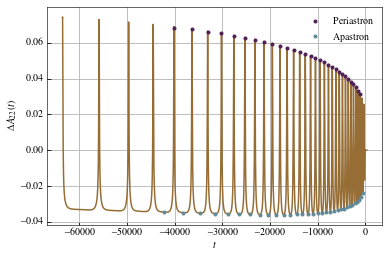

In [67]:
eccMethod.plot_residual_amp22()

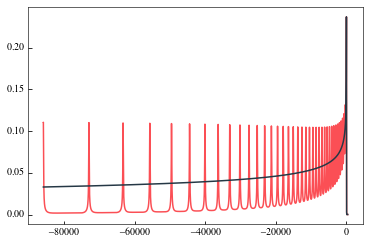

In [62]:
plt.plot(eccMethod.t, eccMethod.amp22)
plt.plot(eccMethod.t, eccMethod.amp22_zeroecc_interp)

In [41]:
ecc_in = 1e-7
dataDict = getDataDict(0.01, ecc_in)
tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                     dataDict=dataDict,
                                                     method="ResidualAmplitude",
                                                     return_ecc_method=True,
                                                    extra_kwargs={'extrema_finding_kwargs': {"width": 25},
                                                                 "treat_mid_points_between_peaks_as_troughs": True})

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


In [42]:
# !pip install ipympl
# %matplotlib widget

(-20000.0, -10000.0)

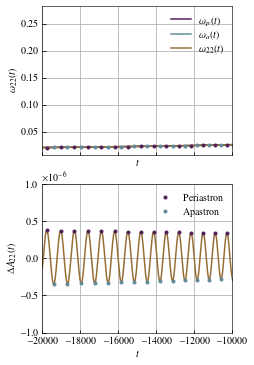

In [46]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 6), sharex=True)
eccMethod.plot_extrema_in_omega22(fig, ax[0])
# ax[0].set_ylim(0.0, 0.07)
# ax[0].set_xlim(right=-40000)

eccMethod.plot_residual_amp22(fig, ax[1])
ax[1].set_ylim(-1e-6, 1e-6)
ax[1].set_xlim(-20000, -10000)
# ax[1].set_ylim(-0.0331, -0.0330)

In [23]:
# fig.subplots_adjust(left=0.2, bottom=0.07, top=0.98, right=0.95, hspace=0.1)
# fig.savefig("../../../public_html/EccDefinition/debug_high_ecc_amp.pdf")

In [24]:
eccMethod.extra_kwargs

{'extrema_finding_kwargs': {'width': 25,
  'height': None,
  'threshold': None,
  'distance': None,
  'prominence': None,
  'wlen': None,
  'rel_height': 0.5,
  'plateau_size': None},
 'treat_mid_points_between_peaks_as_troughs': True,
 'num_orbits_to_exclude_before_merger': 1,
 'debug': True,
 'omega22_averaging_method': 'average_between_extrema'}